In [11]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pickle.load(open('C:/Users/Nabih/Documents/Phelma/Cenv1(Monitoring project)/Data/processed_data.pkl',"rb"))
# data = pickle.load(open("processed_data.pkl","rb"))
data.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47', 'b3c0', 'b3c1', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30

In [3]:
data['b1c0']['cycles']['1'].keys()

dict_keys(['Qdlin', 'Tdlin', 'Vdlin'])

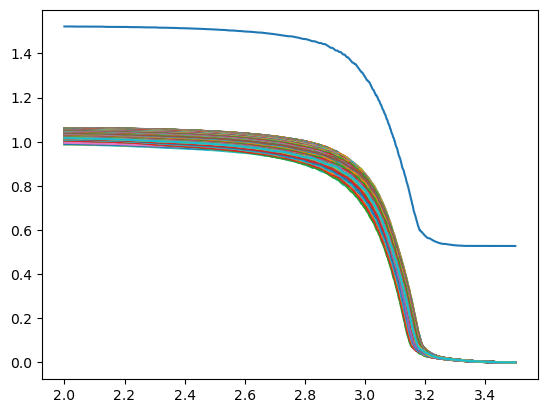

In [4]:
x = [data['b1c0']['cycles'][i]['Qdlin'] for i in data['b1c0']['cycles'].keys()]

y = [data['b1c0']['cycles'][i]['Vdlin'] for i in data['b1c0']['cycles'].keys()]
for i in range(1000):
    plt.plot(y[i], x[i])

Text(0, 0.5, 'QD')

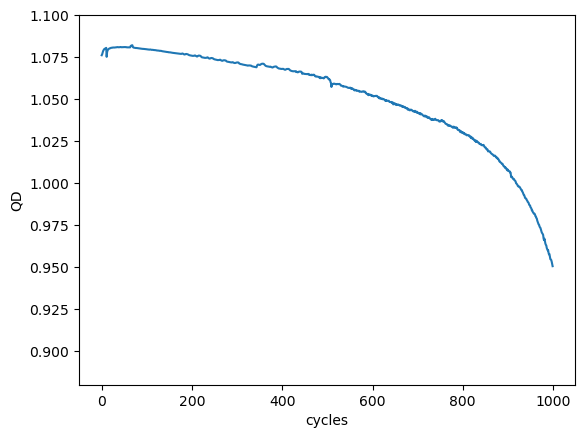

In [10]:
x0 = [data[key]['summary']['QD'] for key in data.keys()]
# for i in range(len(x0)):
#     plt.plot(x0[i][:1000])

plt.plot(x0[5][:1000])
plt.ylim(0.88,1.1)

plt.xlabel('cycles')
plt.ylabel('QD')

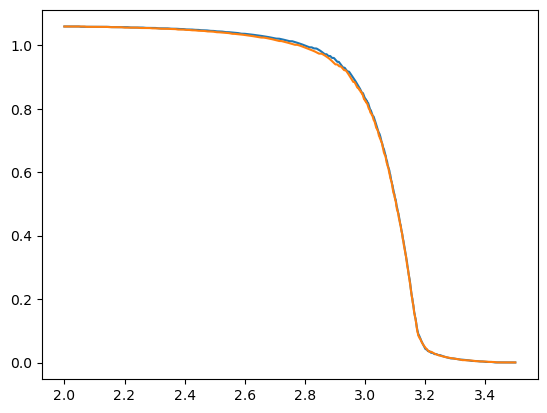

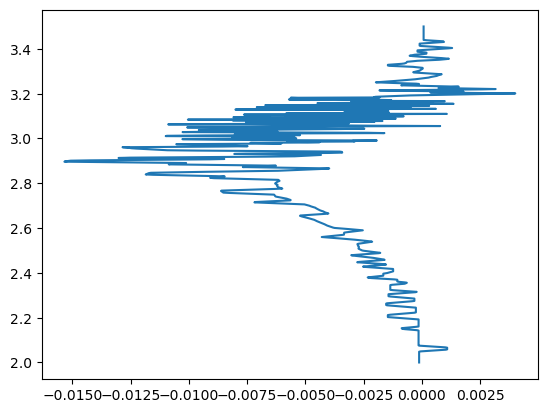

In [12]:
xx = [data['b1c0']['cycles']['10']['Qdlin'], data['b1c0']['cycles']['100']['Qdlin']]
yy = [data['b1c0']['cycles']['10']['Vdlin'], data['b1c0']['cycles']['100']['Vdlin']]

diff = xx[1] -  xx[0]

for i in range(len(xx)):
    plt.plot(yy[i],xx[i])
plt.show()
plt.plot(diff,yy[0])
plt.show()

In [7]:
data['b1c19']['cycles'].keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157'

In [19]:
# generating data
xxx = [[data[cell]['cycles']['10']['Qdlin'], data[cell]['cycles']['100']['Qdlin']] for cell in data.keys()][:124]
delta_Q = []

for i in range(len(xxx)):
    delta_Q.append(xxx[i][1]-xxx[i][0])

cycles = [np.log(data[cell]['cycle_life']) for cell in data.keys()]
min_deltaq = [np.log(abs(min(i))) for i in delta_Q]



(1000,)


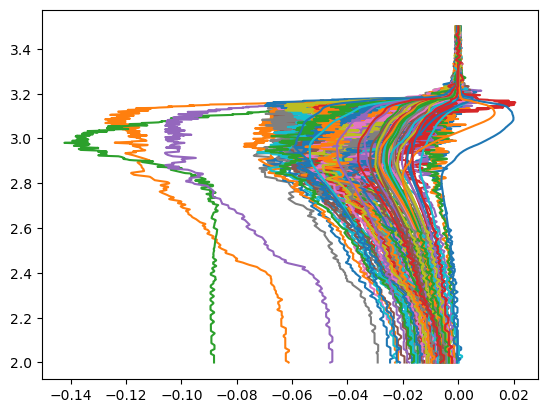

In [13]:
yyy = [[data[cell]['cycles']['10']['Vdlin'], data[cell]['cycles']['100']['Vdlin']] for cell in data.keys()][:124]


for el in delta_Q:
    plt.plot(el, yyy[0][0])

print(xxx[0][0].shape)

In [36]:
# testing our first model
Y = cycles #prediction 
X = min_deltaq
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)


In [37]:
# transforming the 1D array to 2D array
X_trainn = np.array(X_train)
y_trainn = np.array(y_train)
X_testt = np.array(X_test)
y_testt = np.array(y_test)

In [38]:
model = LinearRegression()

model.fit(X_trainn.reshape(-1,1), y_trainn)

LinearRegression()

In [39]:

# Evaluate the model on the test data
y_pred = model.predict(X_testt.reshape(-1,1))
mae = mean_absolute_error(y_testt, y_pred)
mse = mean_squared_error(y_testt, y_pred)
r2 = r2_score(y_testt, y_pred)
print(mae, mse, r2)

0.12839393223627962 0.031967717451960705 0.816799895335581


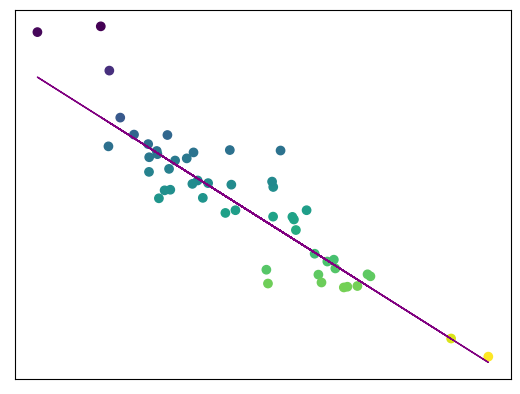

In [40]:
# Plot outputs
plt.scatter(X_testt, y_testt, c=y_testt, cmap='viridis_r')
plt.plot(X_testt, y_pred, color="purple", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Professor's notes :
# try linear combination with other features, add a penalisation (L2), have a metric (mae...)
# report : dont develop the general context too much (1 or 2 slides)
# make the presentation fun, students oriented..


In [29]:
# trying cross validation 'cause why not? 
# then I need desactivate the previous blocks yikes
lm = LinearRegression()
scores_r2 = cross_val_score(lm, X_trainn.reshape(-1,1), y_trainn, scoring='r2', cv=10)
scores_mse = cross_val_score(lm, X_trainn.reshape(-1,1), y_trainn, scoring='neg_mean_squared_error', cv=10)

In [30]:
print(scores_r2, np.mean(scores_r2), scores_mse, np.mean(scores_mse))


[0.72214367 0.84900012 0.82938    0.79618618 0.77924401 0.86468343
 0.53132347 0.81659018 0.35116816 0.86571869] 0.740543789742796 [-0.02544735 -0.02936941 -0.02385849 -0.01956688 -0.02175098 -0.03076876
 -0.0461701  -0.05430809 -0.10442497 -0.04473391] -0.04003989263556003
